In [53]:

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt


import sklearn.metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

In [54]:
cust_churn=pd.read_csv('telecom_churn_data.csv')
cust_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [55]:
cust_churn.shape

(99999, 226)

In [56]:
# Drop the most redundant columns

cust_churn.drop(['mobile_number','circle_id'],1,inplace=True)

In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase [Month 6 & 7]
The ‘action’ phase [Month 8]
The ‘churn’ phase [Month 9]
In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# Filter High Value Customers

Lets filter all the recharge columns and analyse

In [57]:
rech_cols=cust_churn.columns[cust_churn.columns.str.contains('rech_data|rech_amt')]

rech_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [58]:
# Lets look for null values of reach_cols

cust_churn[rech_cols].isnull().mean()*100

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

In [59]:
cust_churn[rech_cols].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


We can see that the missing count for 'date_of_last_rech_data_x' , 'total_rech_data_x', 'max_rech_data_x' and 'av_rech_amt_data_x' have the same missing percentage. That means the user hasn't done any recharge for the period hence we can impute those with 0

In [60]:
cust_churn['total_rech_data_6']=cust_churn['total_rech_data_6'].fillna(0)
cust_churn['total_rech_data_7']=cust_churn['total_rech_data_7'].fillna(0)
cust_churn['total_rech_data_8']=cust_churn['total_rech_data_8'].fillna(0)
cust_churn['total_rech_data_9']=cust_churn['total_rech_data_9'].fillna(0)

In [61]:
cust_churn['date_of_last_rech_data_6']=cust_churn['date_of_last_rech_data_6'].fillna(0)
cust_churn['date_of_last_rech_data_7']=cust_churn['date_of_last_rech_data_7'].fillna(0)
cust_churn['date_of_last_rech_data_8']=cust_churn['date_of_last_rech_data_8'].fillna(0)
cust_churn['date_of_last_rech_data_9']=cust_churn['date_of_last_rech_data_9'].fillna(0)

In [62]:
cust_churn['max_rech_data_6']=cust_churn['max_rech_data_6'].fillna(0)
cust_churn['max_rech_data_7']=cust_churn['max_rech_data_7'].fillna(0)
cust_churn['max_rech_data_8']=cust_churn['max_rech_data_8'].fillna(0)
cust_churn['max_rech_data_9']=cust_churn['max_rech_data_9'].fillna(0)

In [63]:
cust_churn['av_rech_amt_data_6']=cust_churn['av_rech_amt_data_6'].fillna(0)
cust_churn['av_rech_amt_data_7']=cust_churn['av_rech_amt_data_7'].fillna(0)
cust_churn['av_rech_amt_data_8']=cust_churn['av_rech_amt_data_8'].fillna(0)
cust_churn['av_rech_amt_data_9']=cust_churn['av_rech_amt_data_9'].fillna(0)

# There is no month wise total DATA recharge amount provided, hence we need to multiply the number of data recharges with the average recharge amount for that particular month

In [64]:
cust_churn['total_rech_data_amt_6'] = cust_churn['av_rech_amt_data_6'] * cust_churn['total_rech_data_6']

cust_churn['total_rech_data_amt_7'] = cust_churn['av_rech_amt_data_7'] * cust_churn['total_rech_data_7']

cust_churn['total_rech_data_amt_8'] = cust_churn['av_rech_amt_data_8'] * cust_churn['total_rech_data_8']

cust_churn['total_rech_data_amt_9'] = cust_churn['av_rech_amt_data_9'] *cust_churn['total_rech_data_9']

lets drop the above columns to avoid multi collinearity

In [65]:
cust_churn.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
              'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

Let's find out the average recharge done in the first two months(june & july) - The good phase


Total amount spend would be the sum of total data recharge done & total call/sms recharges

In [66]:
#Let's find out the average recharge done in the first two months(june & july) - The good phase Total amount spend would be the sum of total data recharge done & total call/sms recharges

avg_rech_6n7 = (cust_churn['total_rech_amt_6'].fillna(0) 
+ cust_churn['total_rech_amt_7'].fillna(0) 
+ cust_churn['total_rech_data_amt_6'].fillna(0) 
+ cust_churn['total_rech_data_amt_7'].fillna(0))/2

# Filter high-value customers

Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [67]:
perc_70_6n7 = np.percentile(avg_rech_6n7, 70.0)

print("70 percentile is : ", perc_70_6n7)

70 percentile is :  478.0


Filter the given data set for 70-th percentile, those will be the high valued customers of our interest.

In [68]:
cust_churn_hv_cust = cust_churn[avg_rech_6n7 >= perc_70_6n7]

print("Dimensions of the filtered dataset:",cust_churn_hv_cust.shape)

Dimensions of the filtered dataset: (30001, 220)


After filtering the high-value customerswe got 30k rows

# Tag churners and remove attributes of the churn phase

In [69]:
# Filter the 9th month columns for further analysis

month_9=list(filter(lambda x:'_9' in x,list(cust_churn_hv_cust.columns)))

month_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_rech_dat

lets  tag the churned customers (churn=1, non churn= 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names). &check;

In [70]:
cust_churn_hv_cust['churn'] = np.where(cust_churn_hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

cust_churn_hv_cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/

# Lets drop the 9-th month features, those are no longer needed for the analysis

In [71]:
cust_churn_hv_cust.drop(month_9,1,inplace=True)

In [72]:
cust_churn_hv_cust.shape

(30001, 168)

In [73]:
# lets find out churn/non churn percentage

cust_churn_hv_cust['churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

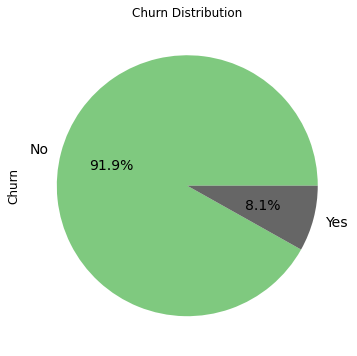

In [74]:
#Churn Distribution

pie_chart = cust_churn_hv_cust['churn'].value_counts()*100.0 /len(cust_churn_hv_cust)

ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14,cmap='Accent' )  

ax.set_ylabel('Churn',fontsize = 12)

ax.set_title('Churn Distribution', fontsize = 12)

plt.show()

There is significant data imbalance w.r.t. the target variable 'churn'. Hence we need to do some resampling before applying any models on the dataset

# Data Cleaning and EDA

# Let's check the columns with no variance in their values and drop such columns

Let's check the columns with no variance in their values and drop such columns

In [75]:
drop_unique_cols=[]

for i in cust_churn_hv_cust.columns:
    if cust_churn_hv_cust[i].nunique() ==1:
        drop_unique_cols.append(i)
        
cust_churn_hv_cust.drop(drop_unique_cols,axis=1,inplace = True)

print('Dropped columns are: \n',drop_unique_cols)

Dropped columns are: 
 ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [76]:
cust_churn_hv_cust.shape

(30001, 156)

In [77]:
(cust_churn_hv_cust.isnull().mean()*100).sort_values(ascending=False)

fb_user_8                   46.825106
arpu_2g_8                   46.825106
arpu_3g_8                   46.825106
night_pck_user_8            46.825106
count_rech_3g_8             46.825106
count_rech_2g_8             46.825106
night_pck_user_6            44.148528
arpu_3g_6                   44.148528
count_rech_3g_6             44.148528
fb_user_6                   44.148528
count_rech_2g_6             44.148528
arpu_2g_6                   44.148528
count_rech_2g_7             43.145228
arpu_2g_7                   43.145228
night_pck_user_7            43.145228
fb_user_7                   43.145228
count_rech_3g_7             43.145228
arpu_3g_7                   43.145228
std_og_mou_8                 3.913203
std_ic_mou_8                 3.913203
isd_og_mou_8                 3.913203
spl_og_mou_8                 3.913203
isd_ic_mou_8                 3.913203
og_others_8                  3.913203
ic_others_8                  3.913203
loc_ic_t2t_mou_8             3.913203
loc_ic_t2m_m

The remaining missing values are all in the Minutes of Usage columns and the maximum missing % is around 3.91 , that means, the customer has not used the particular call type, hence we can fill the missing values with zero.

In [78]:
cust_churn_hv_cust=cust_churn_hv_cust.fillna(0)

In [79]:
cust_churn_hv_cust.shape

(30001, 156)

In [80]:
# Filter the 9th month columns for further analysis

date_cols=list(filter(lambda x:'date' in x,list(cust_churn_hv_cust.columns)))

date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [81]:
# We will drop all the date columns since this will not add any more values to the analysis

cust_churn_hv_cust.drop(date_cols,1,inplace=True)

cust_churn_hv_cust.shape

(30001, 150)

<AxesSubplot:>

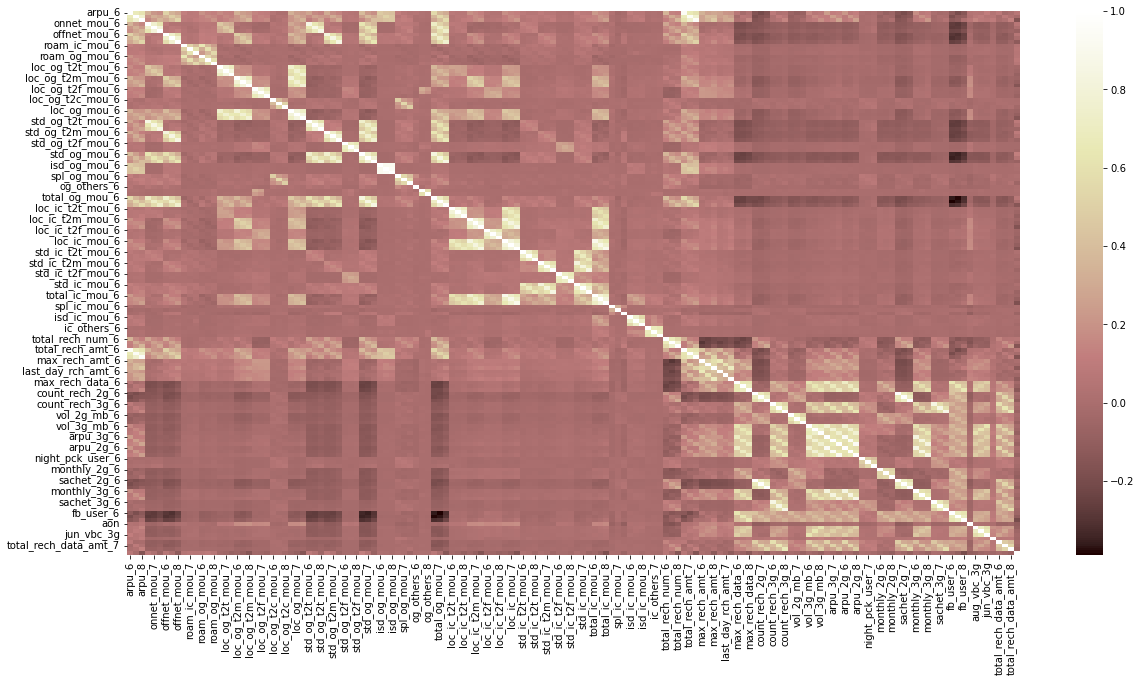

In [82]:
# Correlation heatmap

plt.figure(figsize=(20,10))

sns.heatmap(cust_churn_hv_cust.corr(),cmap='pink')

Finding : There are some strong multicollinearity spotted

In [83]:
df = cust_churn_hv_cust.select_dtypes(include =[np.number])

df.shape

(30001, 150)

In [84]:
# Lets do some analysis on tenure related variable 'aon', let's create a new dataframe 'tenure_data' for the purpose

tenure_data = cust_churn_hv_cust.copy()

In [85]:
plt.figure(figsize=(14,8))

# aon --> Age on network - number of days the customer is using the operator T network, we will convert this to months

tenure_data['tenure'] = tenure_data['aon']/30

tenure_data['tenure'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: tenure, dtype: float64

<Figure size 1008x576 with 0 Axes>

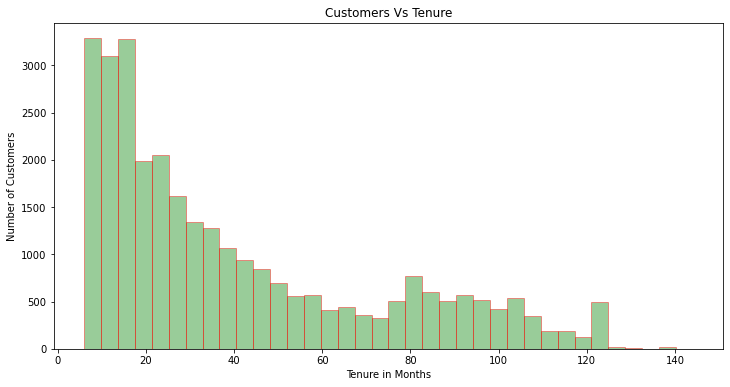

In [88]:
plt.figure(figsize=(12,6))

ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'Green',
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})

ax.set_ylabel('Number of Customers')

ax.set_xlabel('Tenure in Months')

ax.set_title('Customers Vs Tenure')

plt.show()

In [89]:
# We will do some variable transformation and binning for better understanding

tn_range = [0, 6, 12, 24, 60, 61]

tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']

tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)

tenure_data['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

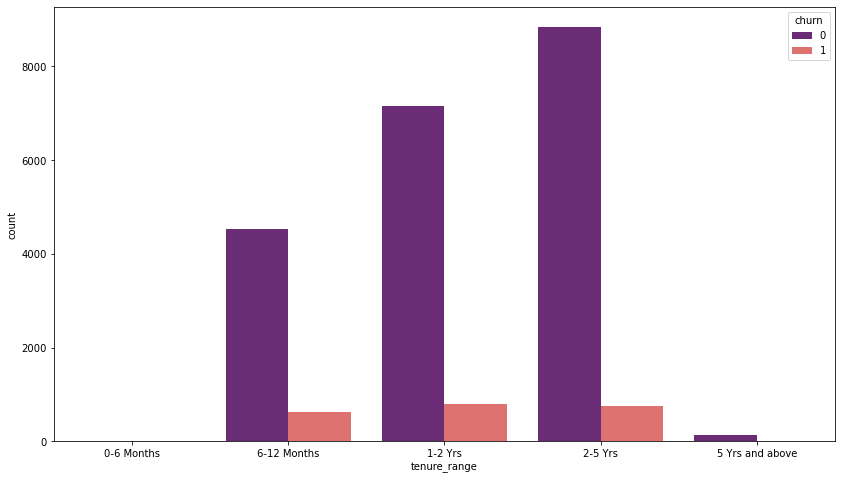

In [90]:
plt.figure(figsize=(14,8))

sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("magma"))

plt.show()

In [97]:
# Lets define a custom function to plot heatmaps

def heatmap(x,y,dataframe):
    
    plt.figure(figsize=(x,y))
    
    sns.heatmap(dataframe.corr(),cmap="Blues",annot=True)
    
    plt.show()
    

In [98]:
# Let's filter the columns for Minutes of Usage of Outgoing calls, for months 6,7 and 8

mou_og_cols = cust_churn_hv_cust.columns[cust_churn_hv_cust.columns.str.contains('.*_og_.*mou_',regex=True)]

mou_og_cols

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')

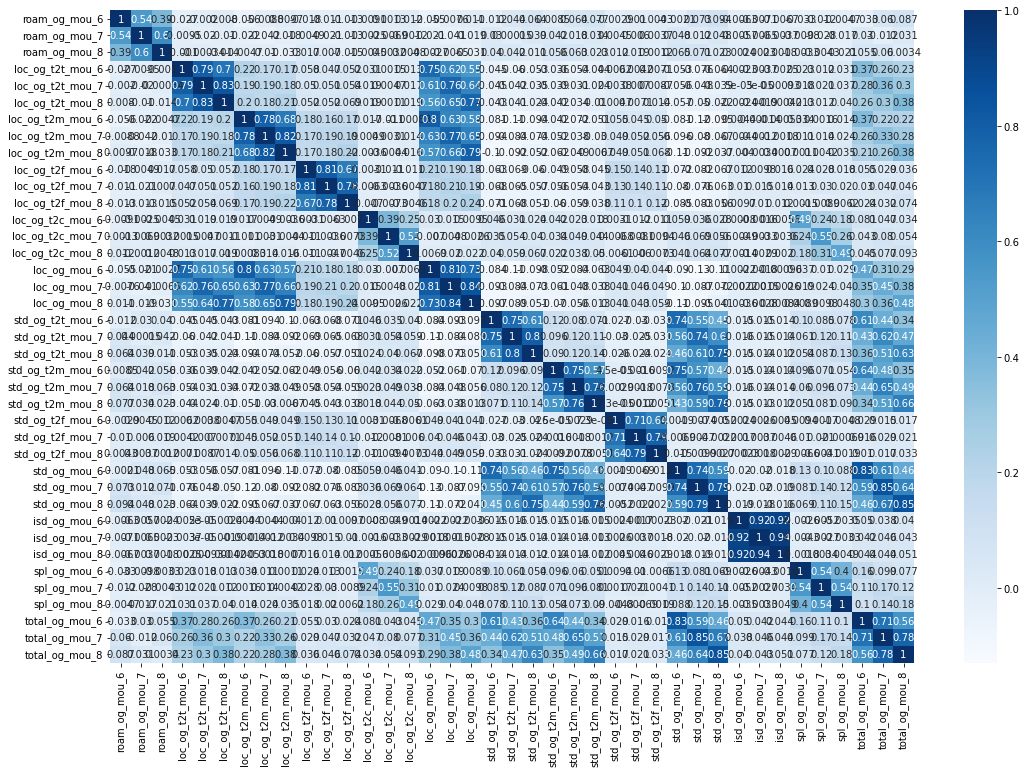

In [99]:
#lets bulid heat map for mou_og_cols
heatmap(18,12,cust_churn_hv_cust.filter(mou_og_cols))

We can see that 'total_og_mou_x', 'std_og_mou_x' and 'loc_og_mou_x' seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [100]:
# Let's filter the columns for Minutes of Usage of Outgoing calls, for month 6

mou_og_cols=list(cust_churn_hv_cust.columns[cust_churn_hv_cust.columns.str.contains('total_og_mou_|std_og_mou_|loc_og_mou_')])

mou_og_cols

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [101]:
#Let's drop the higly correlated outgoing minutes of usage columns 

cust_churn_hv_cust.drop(mou_og_cols,1,inplace=True)

In [102]:
cust_churn_hv_cust.shape

(30001, 141)

In [103]:
# Let's filter the columns for Minutes of Usage of Outgoing calls, for months 6,7 and 8

mou_ic_cols = cust_churn_hv_cust.columns[cust_churn_hv_cust.columns.str.contains('.*_ic_.*mou_',regex=True)]

mou_ic_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8'],
      dtype='object')

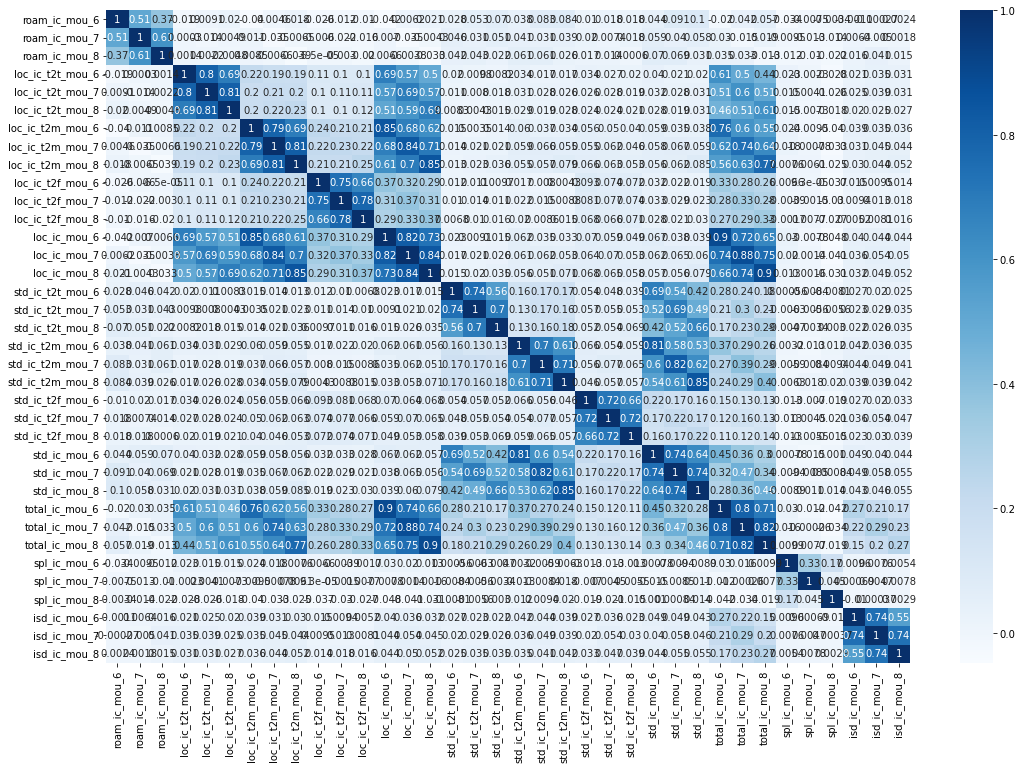

In [104]:
heatmap(18,12,cust_churn_hv_cust.filter(mou_ic_cols))

We can see that total_ic_mou_x, std_ic_mou_x and loc_ic_mou_x seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues

In [105]:
mou_ic_cols=list(cust_churn_hv_cust.columns[cust_churn_hv_cust.columns.str.contains('total_ic_mou_|std_ic_mou_|loc_ic_mou_')])

mou_ic_cols

['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [106]:
#Let's drop the higly correlated incoming minutes of usage columns

cust_churn_hv_cust.drop(mou_ic_cols,1,inplace=True)

In [107]:
cust_churn_hv_cust.shape

(30001, 132)

# Let us conduct appropriate exploratory analysis to extract useful insights

In [108]:
def plot_mean_bar_chart(df,columns_list):
    
    df_0 = df[df.churn==0].filter(columns_list)
    
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0,color=['green','grey'])
    
    plt.show()
    
    return mean_bar

In [115]:
# create box plot for  6th, 7th and 8th month

def plot_box_chart(col):
    
    plt.figure(figsize=(20,16))
    
    df = cust_churn_hv_cust
    
    plt.subplot(2,3,1)
    
    sns.boxplot(data=cust_churn_hv_cust, y=col+"_6",x="churn",hue="churn",
                showfliers=False,palette=("magma"))
    
    plt.subplot(2,3,2)
    
    sns.boxplot(data=cust_churn_hv_cust, y=col+"_7",x="churn",hue="churn",
                
                showfliers=False,palette=("magma"))
    plt.subplot(2,3,3)
    
    sns.boxplot(data=cust_churn_hv_cust, y=col+"_8",x="churn",hue="churn",
                showfliers=False,palette=("magma"))
    plt.show()

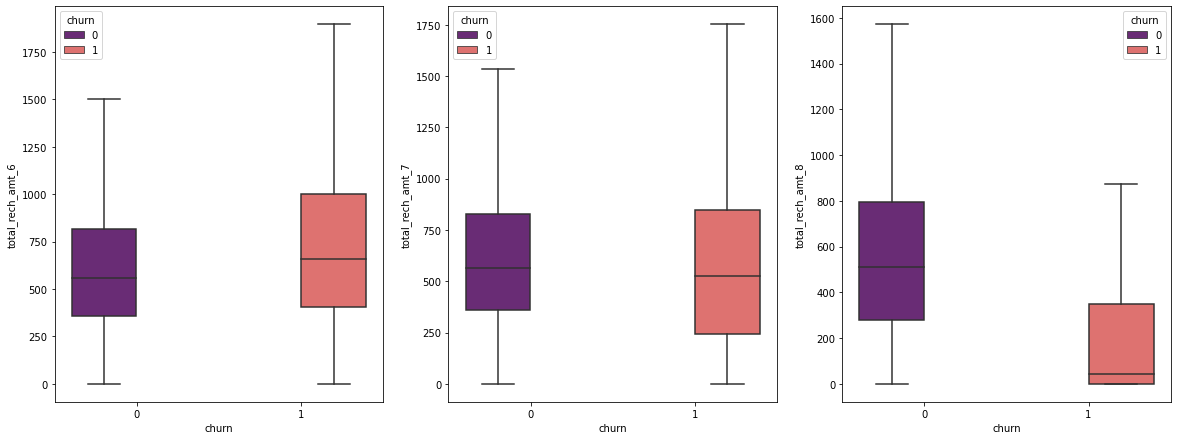

In [116]:
# Ploting Total recharge amount:

plot_box_chart('total_rech_amt')

 We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

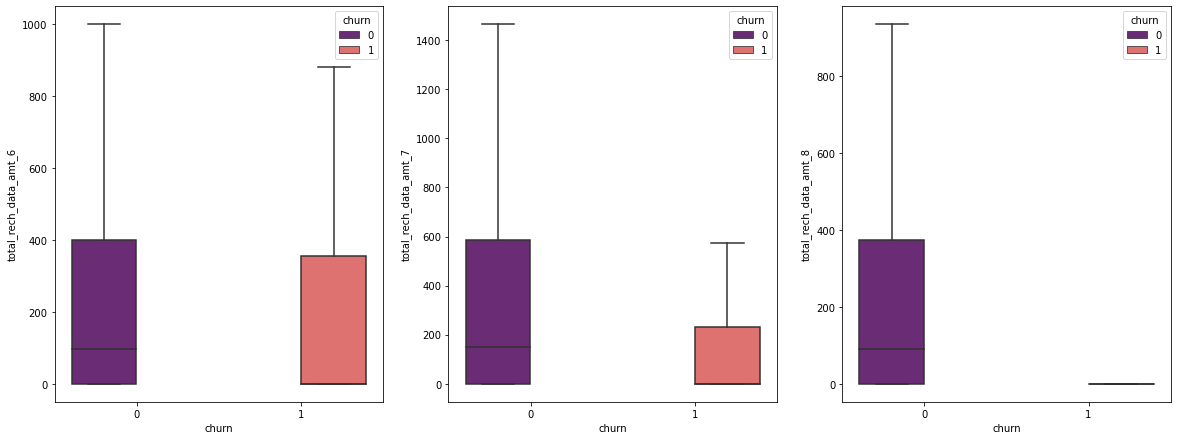

In [117]:
# Ploting for total recharge amount for data:

plot_box_chart('total_rech_data_amt')

We can see that there is a huge drop(nrgligibly less) in total recharge amount for data in the 8th month (action phase) for churned customers.

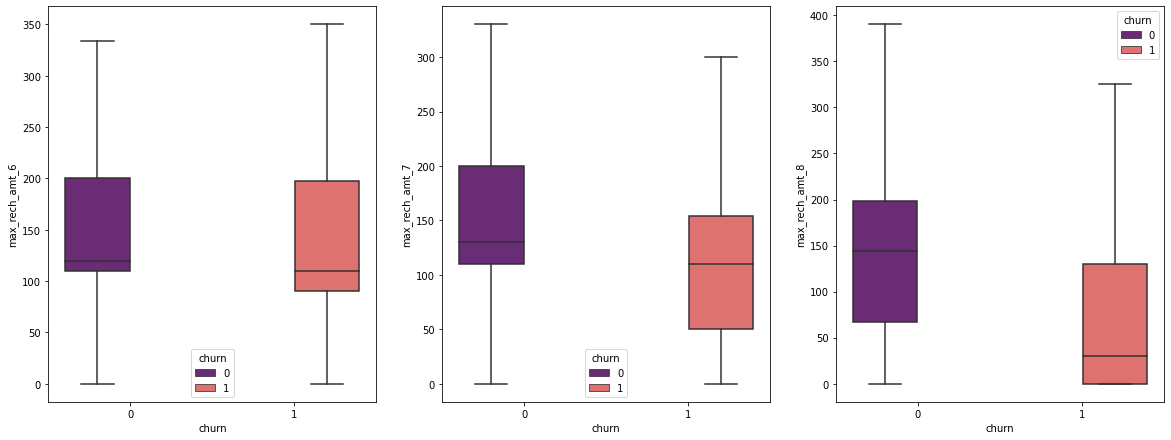

In [118]:
# Ploting for Maximum recharge amount for data:

plot_box_chart('max_rech_amt')

Here also We can see the drop for max_rech_amt in the 8th month

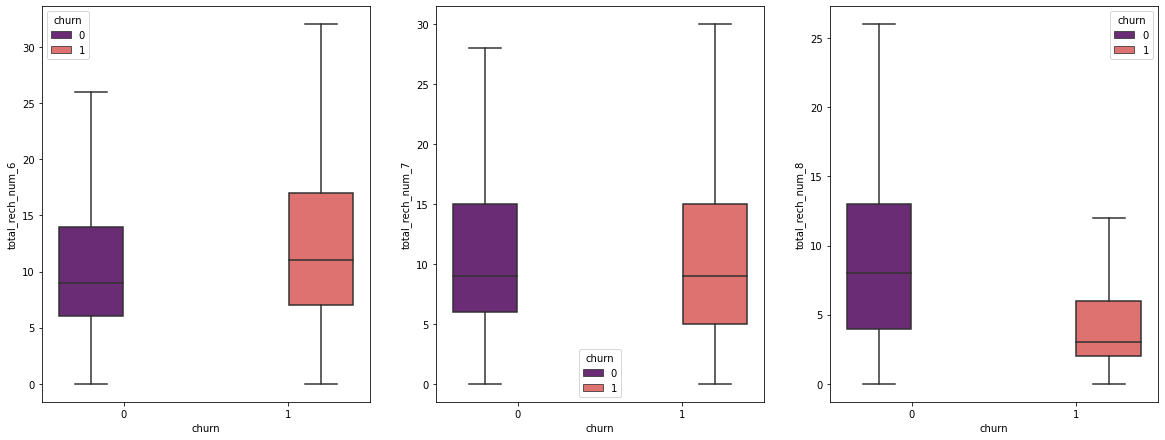

In [120]:
# Ploting for Total number of rechargs

plot_box_chart('total_rech_num')

We can see the drop for total_rech_num in the 8th month

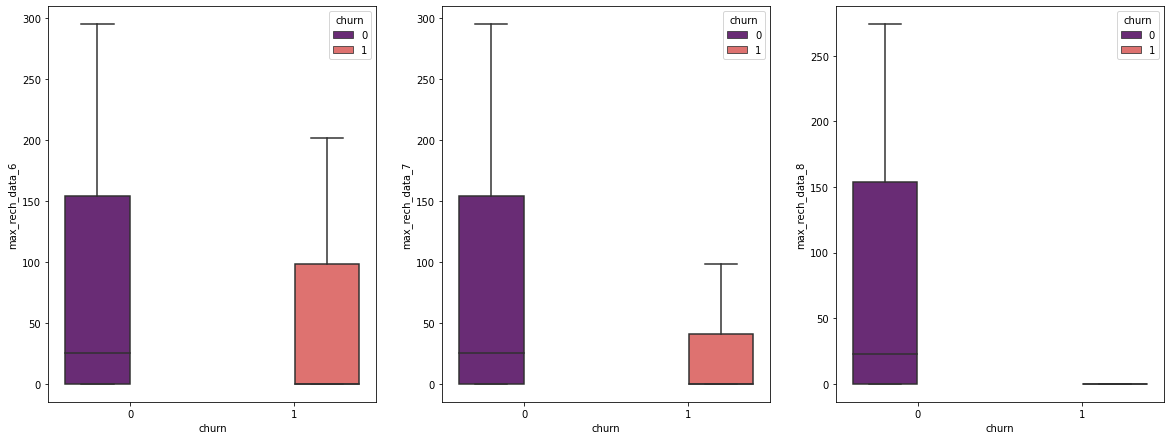

In [121]:
# Ploting for Maximum recharge data

plot_box_chart('max_rech_data')

We can see that there is a huge drop in maximum data recharge in the 8th month (action phase) for churned customers.

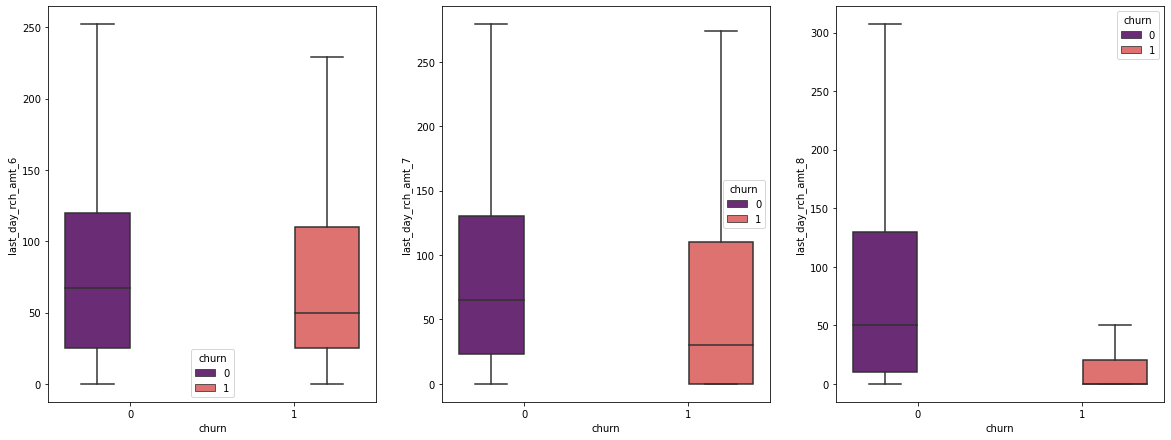

In [122]:
# Ploting for last day recharge amount:

plot_box_chart('last_day_rch_amt')

We can see that there is a huge drop in last day recharge amount in the 8th month (action phase) for churned customers.

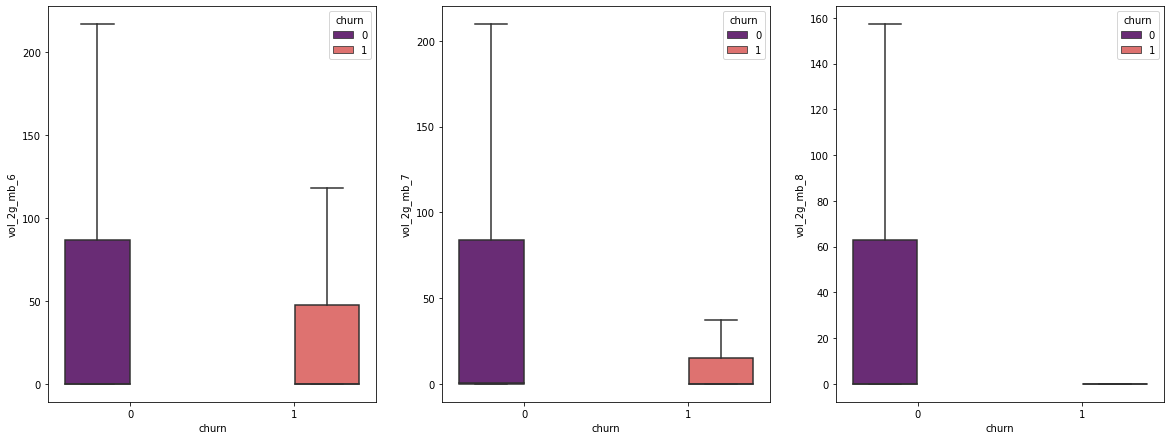

In [123]:
# Ploting for volume of 2G usage columns:

plot_box_chart('vol_2g_mb')

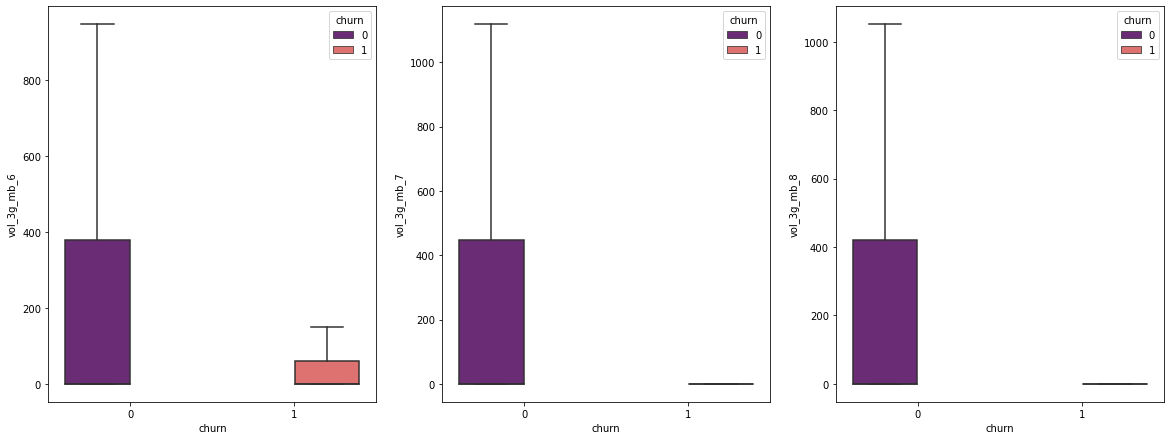

In [124]:
# Ploting for volume of 3G usage columns:

plot_box_chart('vol_3g_mb')

We have two observations from above: 2G and 3G usage for churned customers dropped in the 8th month

 Also 2G/3G usage is higher for non-churned customers.

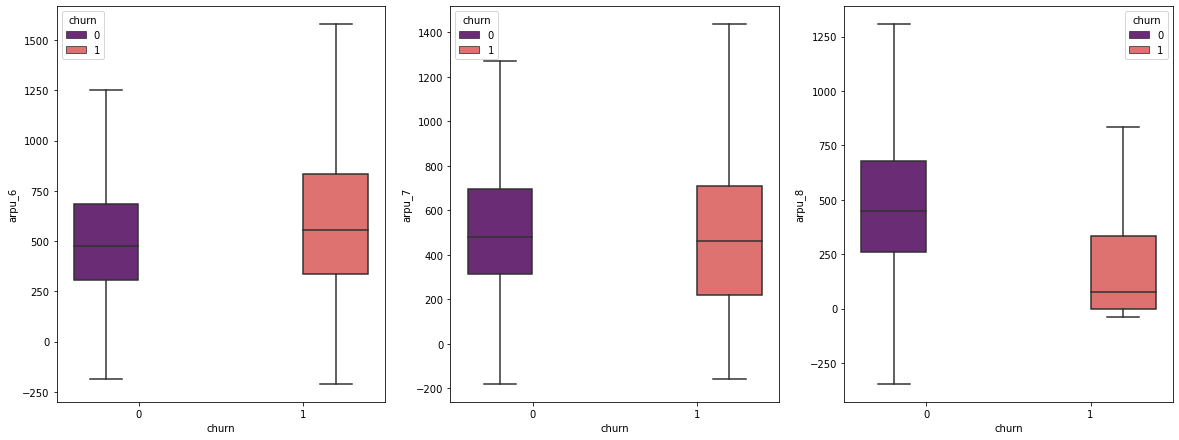

In [125]:
# Plotting average Revenue Per User

plot_box_chart('arpu')

We can see that huge drops for Average revenue per user in 8th month for churned customers

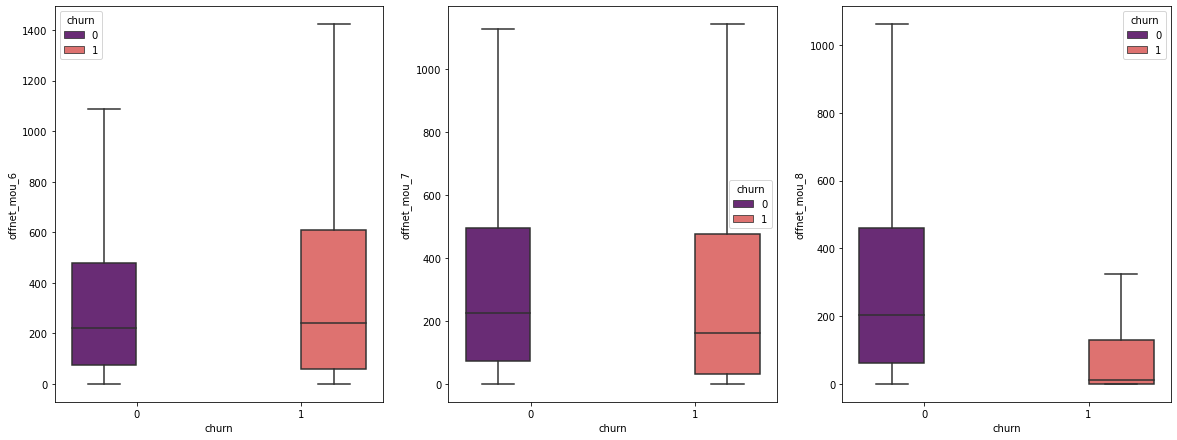

In [126]:
#Offnet Minutes of Usage for churned and non churned customers (OFFNET : All kind of calls outside the same operator network)

plot_box_chart('offnet_mou')

We can see the drop for Offnet minutes of usage services in the 8th month

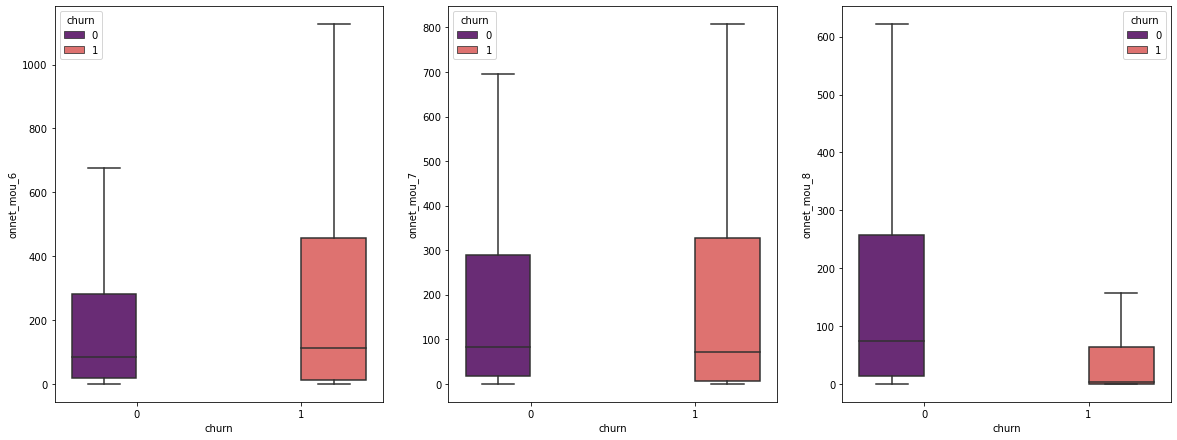

In [127]:
# Plotting Onnet Minutes of Usage for churned and non churned customers

plot_box_chart('onnet_mou')

We can see the drop for onnet minutes of usage services in the 8th month

# 2G & 3G - Usage Based Variables

In [129]:
monthly_subcription_2g_3g = cust_churn_hv_cust.columns[cust_churn_hv_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

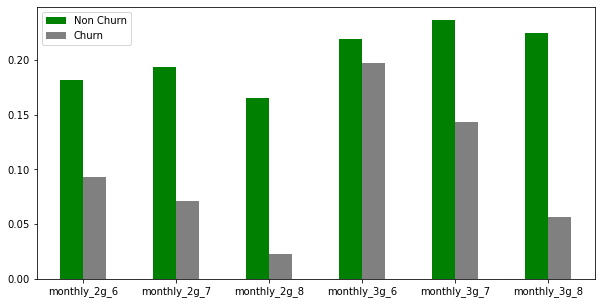

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181676,0.193215,0.165203,0.219557,0.236575,0.224673
Churn,0.093404,0.070873,0.022941,0.197460,0.143794,0.056944


In [130]:
plot_mean_bar_chart(cust_churn_hv_cust, monthly_subcription_2g_3g)

here when we compare all the 2G & 3G data in the chart we can see that there is drop in the subscription in 8th month

In [132]:
vbc_column = cust_churn_hv_cust.columns[cust_churn_hv_cust.columns.str.contains('vbc_3g',regex=True)]

vbc_column.tolist()



['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [133]:
# Renaming month named vbc columns to 6,7,8,9 format 

cust_churn_hv_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True) #key value is used to rename

In [134]:
# Dropping 9th month 

cust_churn_hv_cust.drop('vbc_3g_9',1,inplace=True)

In [136]:
#lets check after dropping month 9 form the above list
vbc_column = cust_churn_hv_cust.columns[cust_churn_hv_cust.columns.str.contains('vbc_3g',regex=True)]

vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

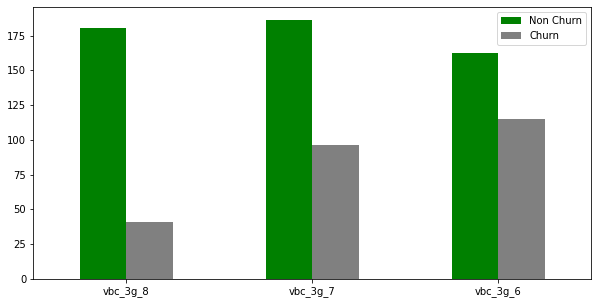

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.501280,186.206078,162.370343
Churn,40.851975,96.076317,115.096575


In [137]:
#lets plot bar of 'cust_churn_hv_cust', 'vbc_column'
plot_mean_bar_chart(cust_churn_hv_cust, vbc_column)

here we can see there is drop in 8th month of 3G user 

In [138]:
# Checking Service schemes with validity smaller than a month for 2G/3G

SC_2g_or_3g_col = cust_churn_hv_cust.columns[cust_churn_hv_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

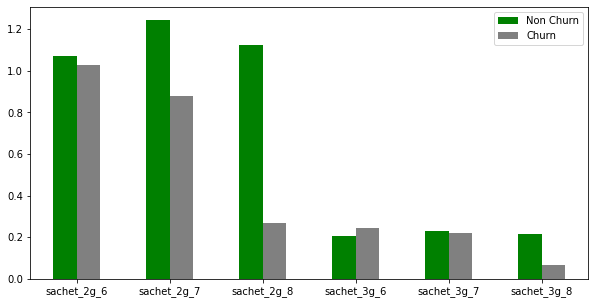

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.069303,1.243832,1.124383,0.206313,0.228048,0.214550
Churn,1.029496,0.877509,0.269971,0.244162,0.221221,0.065137


In [139]:
plot_mean_bar_chart(cust_churn_hv_cust, SC_2g_or_3g_col)

We can see the drop in sachet services in 8th month for churned cutsomers

In [140]:
cust_churn_hv_cust.shape


(30001, 131)

In [141]:
cor_matrix = cust_churn_hv_cust.corr().abs()

print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]

# we will drop the columns with high correlation (+/- 60%)
                 
cust_churn_hv_cust.drop(to_drop, axis=1, inplace=True)

print('Dropped columns which have high correlation are :',to_drop )

                         arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                 1.000000  0.671732  0.612617     0.342438     0.216136   
arpu_7                 0.671732  1.000000  0.759858     0.211608     0.320818   
arpu_8                 0.612617  0.759858  1.000000     0.151677     0.233728   
onnet_mou_6            0.342438  0.211608  0.151677     1.000000     0.750708   
onnet_mou_7            0.216136  0.320818  0.233728     0.750708     1.000000   
onnet_mou_8            0.186807  0.270330  0.347706     0.620316     0.806053   
offnet_mou_6           0.509280  0.351713  0.279066     0.090624     0.054915   
offnet_mou_7           0.339350  0.490176  0.377210     0.039540     0.085163   
offnet_mou_8           0.285100  0.395668  0.524798     0.037030     0.077621   
roam_ic_mou_6          0.126884  0.092501  0.087996     0.024517     0.038078   
roam_ic_mou_7          0.083484  0.093692  0.077709     0.024512     0.008422   
roam_ic_mou_8          0.090

In [142]:
cust_churn_hv_cust.shape

(30001, 48)

In [143]:
cust_churn_hv_cust.columns

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_6',
       'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'vol_2g_mb_6', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'aon', 'total_rech_data_amt_6', 'churn'],
      dtype='object')

# Train and Test Split

In [145]:
X = cust_churn_hv_cust.drop(['churn'], axis=1)

y = cust_churn_hv_cust['churn']

cust_churn_hv_cust.drop('churn', axis=1, inplace=True)

In [146]:
# split the dateset into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

print("Dimension of X_train:", X_train.shape)

print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 47)
Dimension of X_test: (9001, 47)


# standardization data

In [147]:
# Apply scaling on the dataset

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols=X_train.columns

X_train[cols]= scaler.fit_transform(X_train[cols])

X_test[cols]=scaler.transform(X_test[cols])

# SMOTE Analysis

In [148]:
# As discussed earlier, given dataset is skewed, lets balance the dataset

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [149]:
X_tr.shape

(38576, 47)

In [150]:
print("Imbalance in Training dataset after SMOTE :",(y_tr != 0).sum()/(y_tr == 0).sum())

Imbalance in Training dataset after SMOTE : 1.0


# Model Building

# Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,plot_roc_curve,f1_score,precision_score,recall_score

lr = LogisticRegression(random_state=42)

lr.fit(X_train,y_train)

# Prediction on train set

y_pred_train=lr.predict(X_train)

acc=accuracy_score(y_train, y_pred_train)

f_1=f1_score(y_train, y_pred_train)

prec=precision_score(y_train, y_pred_train)

rec=recall_score(y_train, y_pred_train)

In [152]:
print('Accuracy of LR without balancing on train data',acc,'\n')

print('F1 Score of LR without balancing on train data',f_1,'\n')

print('Precision Score of LR without balancing on train data',prec,'\n')

print('Recall Score of LR without balancing on train data',rec)

Accuracy of LR without balancing on train data 0.9206666666666666 

F1 Score of LR without balancing on train data 0.1043010752688172 

Precision Score of LR without balancing on train data 0.6554054054054054 

Recall Score of LR without balancing on train data 0.0566588785046729


In [153]:
# Prediction on test set

y_pred_test = lr.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8272
           1       0.56      0.05      0.10       729

    accuracy                           0.92      9001
   macro avg       0.74      0.52      0.53      9001
weighted avg       0.89      0.92      0.89      9001



In [154]:
print('Accuracy of LR without balancing on test data',accuracy_score(y_test, y_pred_test),'\n')

Accuracy of LR without balancing on test data 0.9198977891345406 



In [155]:
# Let's create a dataframe to store the model scores
metric_df_final=pd.DataFrame({'Model':'LR w/o Balancing','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])


# Logistic Regression with balanced class_weight

In [156]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,plot_roc_curve

lr = LogisticRegression(random_state=42, class_weight='balanced')

lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)

acc=accuracy_score(y_train, y_pred_train)

f_1=f1_score(y_train, y_pred_train)

prec=precision_score(y_train, y_pred_train)

rec=recall_score(y_train, y_pred_train)

Since out target variable is higly inbalanced, a high accuracy is not a good indicator of the model performance, hence we need to apply some data balancing technique

In [157]:
print('Accuracy of LR with weighted class balancing on train data',acc,'\n')

print('F1 Score of LR with weighted class balancing on train data',f_1,'\n')

print('Precision Score of LR with weighted class balancing on train data',prec,'\n')

print('Recall Score of LR with weighted class balancing on train data',rec)

Accuracy of LR with weighted class balancing on train data 0.6991904761904761 

F1 Score of LR with weighted class balancing on train data 0.2978770701344893 

Precision Score of LR with weighted class balancing on train data 0.18393960192175704 

Recall Score of LR with weighted class balancing on train data 0.7827102803738317


In [158]:
# Prediction on test set

y_pred_test = lr.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      8272
           1       0.19      0.79      0.30       729

    accuracy                           0.70      9001
   macro avg       0.58      0.74      0.56      9001
weighted avg       0.91      0.70      0.77      9001



In [159]:
print('Accuracy of LR with weighted class balancing on test data',test_acc)

Accuracy of LR with weighted class balancing on test data 0.7042550827685813


In [160]:
metric_df=pd.DataFrame({'Model':'LR w.Class Balancing','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

# Logistic Regression with SMOTE

In [161]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,plot_roc_curve

lr = LogisticRegression()

# Using Balanced dataset using SMOTE

X_tr,y_tr = sm.fit_resample(X_train,y_train)

lr.fit(X_tr,y_tr)

LogisticRegression()

In [162]:
# Prediction on train set

y_pred_train=lr.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)

In [163]:
print('Accuracy of LR with SMOTE balancing on train data',acc,'\n')

print('F1 Score of LR with SMOTE balancing on train data',f_1,'\n')

print('Precision Score of LR with SMOTE balancing on train data',prec,'\n')

print('Recall Score of LR with SMOTE balancing on train data',rec)

Accuracy of LR with SMOTE balancing on train data 0.7564288676897553 

F1 Score of LR with SMOTE balancing on train data 0.7697623131585396 

Precision Score of LR with SMOTE balancing on train data 0.7298113558219497 

Recall Score of LR with SMOTE balancing on train data 0.8143405226047283


In [164]:
#Prediction on test set

y_pred_test=lr.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      8272
           1       0.19      0.78      0.30       729

    accuracy                           0.71      9001
   macro avg       0.58      0.74      0.56      9001
weighted avg       0.91      0.71      0.77      9001



In [165]:
print('Accuracy of LR with SMOTE balancing on test data',test_acc)

Accuracy of LR with SMOTE balancing on test data 0.706477058104655


In [166]:
metric_df=pd.DataFrame({'Model':'LR w.SMOTE Balancing','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

# logistic Regression with out PCA

In [167]:
# Logistic regression model - GLM(Generalized Linear Model)

import statsmodels.api as sm

logm1 = sm.GLM(y_tr,(sm.add_constant(X_tr)), family = sm.families.Binomial())

res=logm1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38528
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 31 Jul 2022   Deviance:                       40739.
Time:                        16:02:49   Pearson chi2:                 1.49e+16
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2083      0.107    -11.302      0.000      -1.418      -0.999
arpu_6                    0.1978      0.029      6.751      0.000       0.140       0.255
onnet_mou_6               0.0747      0.017      4.355      0.000       0.041       0.108
offnet_mou_6              0.1350      0.018      7.452      0.000       0.100       0.171
roam_ic_mou_6            -0.0790      0.014     -5.791      0.000      -0.106      -0.052
roam_ic_mou_7             0.1866      0.019      9.649      0.000       0.149       0.224
roam_og_mou_7             0.1189      0.016      7.592      0.000       0.088       0.150
loc_og_t2t_mou_6         -0.1575      0.018     -8.829      0.000      -0.192      -0.123
loc_og_t2m_mou_6         -0.2525      0.019    -13.399      0.000      -0.289      -0.216
loc_og_t2f_mou_6         -0.2922      0.028    -10.342      0.000      -0.348      -0.237
loc_og_t2c_mou_6         -0.0929      0.019     -4.779      0.000      -0.131      -0.055
loc_og_t2c_mou_7         -0.0595      0.023     -2.535      0.011      -0.106      -0.013
loc_og_t2c_mou_8          0.1351      0.032      4.222      0.000       0.072       0.198
std_og_t2f_mou_6         -0.0290      0.016     -1.799      0.072      -0.061       0.003
isd_og_mou_6              0.0588      0.019      3.148      0.002       0.022       0.095
spl_og_mou_6              0.1497      0.022      6.832      0.000       0.107       0.193
spl_og_mou_7              0.1564      0.028      5.512      0.000       0.101       0.212
spl_og_mou_8             -1.0708      0.048    -22.324      0.000      -1.165      -0.977
og_others_6              -0.0004      0.015     -0.025      0.980      -0.029       0.028
og_others_7              -0.0047      0.034     -0.139      0.889      -0.071       0.062
og_others_8             -17.3770      5.741     -3.027      0.002     -28.629      -6.125
loc_ic_t2t_mou_6         -0.0929      0.017     -5.419      0.000      -0.126      -0.059
loc_ic_t2m_mou_6         -0.0665      0.017     -3.908      0.000      -0.100      -0.033
loc_ic_t2f_mou_6         -0.0341      0.018     -1.861      0.063      -0.070       0.002
std_ic_t2t_mou_6         -0.0065      0.012     -0.524      0.600      -0.031       0.018
std_ic_t2m_mou_6         -0.0218      0.013     -1.670      0.095      -0.047       0.004
std_ic_t2f_mou_6         -0.0803      0.022     -3.725      0.000      -0.122      -0.038
spl_ic_mou_6             -0.0759      0.019     -3.896      0.000      -0.114      -0.038
spl_ic_mou_7             -0.0635      0.034     -1.878      0.060      -0.130       0.003
spl_ic_mou_8             -0.7994      0.037    -21.722      0.000      -0.872      -0.727
isd_ic_mou_6              0.0069      0.020      0.343      0.731      -0.033       0.046
ic_others_6            

In [176]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg,n_features_to_select=20)             # running RFE with 20 variables as output

rfe = rfe.fit(X_tr,y_tr)

In [177]:
# Create a datframe to view the RFE output with the selected variables and their respective ranking

rfe_leads_df = pd.DataFrame({'Predictor': X_tr.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})

rfe_leads_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,arpu_6,True,1
44,monthly_2g_8,True,1
43,monthly_2g_7,True,1
34,max_rech_amt_8,True,1
33,max_rech_amt_7,True,1
32,max_rech_amt_6,True,1
30,ic_others_6,True,1
28,spl_ic_mou_8,True,1
45,aon,True,1
20,loc_ic_t2t_mou_6,True,1


In [178]:
# Apply GLM model to the RFE selected features

rfe_cols = X_tr.columns[rfe.support_]

In [179]:
X_tr_sm = sm.add_constant(X_tr[rfe_cols])

X_tr_sm.head()

,const,arpu_6,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_8,spl_og_mou_6,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_6,spl_ic_mou_8,ic_others_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,monthly_2g_7,monthly_2g_8,aon,total_rech_data_amt_6
0,1.0,-0.900760,-0.170386,-0.213417,-0.361250,-0.515211,-0.202233,0.096138,-0.338461,-0.201283,-0.018417,-0.221511,-0.235864,-0.074556,-0.082026,-0.096249,-0.031216,1.815720,2.084470,1.370598,-0.199003
1,1.0,-0.685852,-0.170386,-0.213417,-0.352798,-0.598707,-0.222497,-0.245300,-0.338461,-0.315054,-0.018417,0.094350,-0.235864,-0.074556,-0.773187,-0.757821,-0.719815,-0.406703,-0.378056,0.125577,0.210919
2,1.0,-0.789438,-0.170386,-0.213417,-0.340321,-0.531199,-0.302585,-0.245300,0.175973,-0.315054,-0.018417,-0.375629,-0.235864,-0.074556,-0.844075,-0.096249,-0.819868,4.038143,-0.378056,-0.944723,1.007878
3,1.0,1.601696,1.356210,7.533905,-0.180591,-0.460415,0.072770,-0.245300,-0.338461,-0.071603,-0.018417,-0.198004,-0.235864,0.620872,2.257286,0.949826,1.293012,-0.406703,-0.378056,0.581736,-0.302661
4,1.0,0.433193,-0.170386,-0.213417,0.411560,0.566804,-0.302585,-0.245300,0.617166,0.190166,-0.018417,-0.290371,-0.235864,-0.074556,-0.460097,-0.345045,-0.643304,-0.406703,-0.378056,-0.784649,-0.302661


In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for multicollinearity among variables

def fetch_vif_df(local_df):
    
    vif_df = pd.DataFrame()
    
    vif_df['Features'] = local_df.columns
    
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    
    vif_df = vif_df.reset_index(drop=True)
    
    return vif_df

In [181]:
logm2 = sm.GLM(y_tr,X_tr_sm, family = sm.families.Binomial())

res=logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 31 Jul 2022   Deviance:                       41084.
Time:                        17:13:15   Pearson chi2:                 1.46e+16
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1923      0.106    -11.290      0.000      -1.399      -0.985
arpu_6                    0.3407      0.016     20.764      0.000       0.309       0.373
roam_ic_mou_7             0.1279      0.017      7.350      0.000       0.094       0.162
roam_og_mou_7             0.1262      0.016      7.995      0.000       0.095       0.157
loc_og_t2t_mou_6         -0.1385      0.017     -8.174      0.000      -0.172      -0.105
loc_og_t2m_mou_6         -0.2745      0.016    -16.999      0.000      -0.306      -0.243
loc_og_t2f_mou_6         -0.3476      0.028    -12.392      0.000      -0.403      -0.293
loc_og_t2c_mou_8          0.0770      0.030      2.544      0.011       0.018       0.136
spl_og_mou_6              0.1368      0.017      8.252      0.000       0.104       0.169
spl_og_mou_8             -0.9624      0.044    -21.777      0.000      -1.049      -0.876
og_others_8             -17.3720      5.669     -3.064      0.002     -28.483      -6.261
loc_ic_t2t_mou_6         -0.1281      0.017     -7.445      0.000      -0.162      -0.094
spl_ic_mou_8             -0.8129      0.037    -22.191      0.000      -0.885      -0.741
ic_others_6              -0.1201      0.044     -2.740      0.006      -0.206      -0.034
max_rech_amt_6            0.2618      0.020     13.188      0.000       0.223       0.301
max_rech_amt_7            0.2075      0.017     12.464      0.000       0.175       0.240
max_rech_amt_8           -1.0148      0.024    -43.021      0.000      -1.061      -0.969
monthly_2g_7             -0.1694      0.019     -8.996      0.000      -0.206      -0.133
monthly_2g_8             -0.6323      0.028    -22.526      0.000      -0.687      -0.577
aon                      -0.4507      0.015    -29.233      0.000      -0.481      -0.421
total_rech_data_amt_6    -0.1923      0.018    -10.578      0.000      -0.228      -0.157
=========================================================================================
"""

In [183]:
# VIF for Feature elimination

fetch_vif_df(X_tr[rfe_cols])

,Features,VIF
0,roam_og_mou_7,1.67
1,max_rech_amt_8,1.66
2,roam_ic_mou_7,1.63
3,max_rech_amt_6,1.61
4,spl_og_mou_8,1.50
5,monthly_2g_8,1.47
6,monthly_2g_7,1.44
7,arpu_6,1.36
8,loc_og_t2c_mou_8,1.33
9,max_rech_amt_7,1.31


Both the p-value and VIF are within permissible range, hence we use this model for our final predictions

In [186]:
#Lets predict the train data

preds = res.predict(sm.add_constant(X_tr[rfe_cols])).values.reshape(-1)

preds

#

array([0.05746795, 0.53592528, 0.51077883, ..., 0.76719036, 0.49569602,
       0.56822268])

In [187]:
# Create a dataframe to store the Churn probabilities

y_train_pred_final = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':preds})

y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.057468
1,0,0.535925
2,0,0.510779
3,0,0.656980
4,0,0.603517


In [188]:
# Let's consider the default threshold of 0.5

y_train_pred_final['pred']=y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

acc=accuracy_score(y_tr, y_train_pred_final['pred'])

f_1=f1_score(y_tr, y_train_pred_final['pred'])

prec=precision_score(y_tr, y_train_pred_final['pred'])

rec=recall_score(y_tr, y_train_pred_final['pred'])

In [189]:
print('Accuracy of GLM with RFE and SMOTE balancing on train data',acc,'\n')

print('F1 Score of GLM with RFE and SMOTE balancing on train data',f_1,'\n')

print('Precision Score of GLM with RFE and SMOTE balancing on train data',prec,'\n')

print('Recall Score of GLM with RFE and SMOTE balancing on train data',rec)

Accuracy of GLM with RFE and SMOTE balancing on train data 0.7500518457071754 

F1 Score of GLM with RFE and SMOTE balancing on train data 0.7650012186205214 

Precision Score of GLM with RFE and SMOTE balancing on train data 0.7218287186091435 

Recall Score of GLM with RFE and SMOTE balancing on train data 0.8136665284114475


In [190]:
#Predictions on test set

test_preds = res.predict(sm.add_constant(X_test[rfe_cols])).values.reshape(-1)

test_preds

array([0.73336284, 0.46145016, 0.29415313, ..., 0.3541704 , 0.48736831,
       0.63530126])

In [191]:
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Test Churn_Prob':test_preds})

y_test_pred_final.head(2)

,Churn,Test Churn_Prob
35865,0,0.733363
41952,0,0.461450


In [192]:
y_test_pred_final['pred']=y_test_pred_final['Test Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

test_acc=accuracy_score(y_test, y_test_pred_final['pred'])

print(classification_report(y_test, y_test_pred_final['pred']))

              precision    recall  f1-score   support

           0       0.97      0.69      0.80      8272
           1       0.18      0.78      0.29       729

    accuracy                           0.69      9001
   macro avg       0.58      0.73      0.55      9001
weighted avg       0.91      0.69      0.76      9001



In [193]:
print('Accuracy of GLM with RFE and SMOTE balancing on test data',test_acc)

Accuracy of GLM with RFE and SMOTE balancing on test data 0.6929230085546051


In [194]:
metric_df=pd.DataFrame({'Model':'GLM/RFE','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

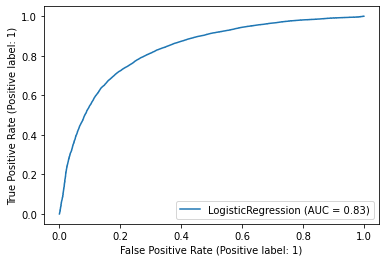

In [195]:
plot_roc_curve(lr, X_tr, y_tr)

plt.show()

# PCA (Principal Component Analysis)

In [196]:
# import PCA

from sklearn.decomposition import PCA

pca = PCA(random_state=100)

# apply PCA on train data with default parameters

pca.fit(X_tr)


PCA(random_state=100)

In [197]:
X_tr_pca = pca.fit_transform(X_tr)

print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)

print(X_test_pca.shape)

(38576, 47)
(9001, 47)


In [198]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

lr_pca = LogisticRegression(C=1e9)

lr_pca.fit(X_tr_pca, y_tr)

# make the predictions on train data

y_pred_train = lr_pca.predict(X_tr_pca)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)

In [199]:
# Printing confusion matrix

print(confusion_matrix(y_tr,y_pred_train))

[[13471  5817]
 [ 3572 15716]]


In [200]:
print('Accuracy of LR with PCA on train data',acc,'\n')

print('F1 Score of LR with PCA on train data',f_1,'\n')

print('Precision Score of LR with PCA on train data',prec,'\n')

print('Recall Score of PCA LR with on train data',rec)

Accuracy of LR with PCA on train data 0.7566103276648694 

F1 Score of LR with PCA on train data 0.769995835476838 

Precision Score of LR with PCA on train data 0.729856499326615 

Recall Score of PCA LR with on train data 0.8148071339693074


In [201]:
# Prediction on test set

y_pred_test = lr_pca.predict(X_test_pca)

test_acc =accuracy_score(y_test,y_pred_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      8272
           1       0.19      0.78      0.30       729

    accuracy                           0.71      9001
   macro avg       0.58      0.74      0.56      9001
weighted avg       0.91      0.71      0.77      9001



In [202]:
print('Accuracy of LR with PCA on test data',test_acc)

Accuracy of LR with PCA on test data 0.7056993667370293


In [203]:
metric_df=pd.DataFrame({'Model':'PCA','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

In [205]:
col = list(cust_churn_hv_cust.columns)

In [206]:
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})

df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.185881,0.359946,0.281835,arpu_6
1,0.050481,0.303458,-0.046813,onnet_mou_6
2,0.106499,0.377100,0.125955,offnet_mou_6
3,0.546571,-0.073977,-0.152345,roam_ic_mou_6
4,0.610553,-0.102661,-0.176457,roam_ic_mou_7
5,0.449101,-0.035938,-0.134694,roam_og_mou_7
6,0.013426,0.124692,0.092995,loc_og_t2t_mou_6
7,0.023098,0.193372,0.232753,loc_og_t2m_mou_6
8,0.018655,0.013427,0.172253,loc_og_t2f_mou_6
9,-0.008938,0.150705,-0.063402,loc_og_t2c_mou_6


# Scree plot to find the optimum value of PCA components

In [207]:
#Cumulative variance explained

var_cumu = np.cumsum(pca.explained_variance_ratio_)

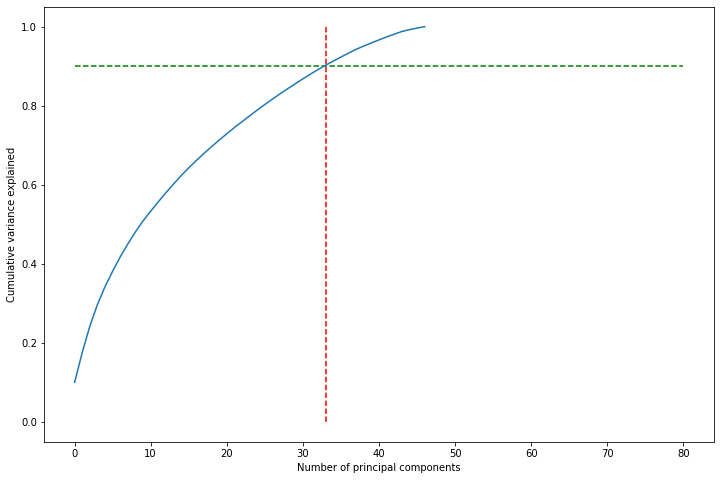

In [208]:
fig = plt.figure(figsize=[12,8])

plt.vlines(x=33, ymax=1, ymin=0, colors="r", linestyles="--")

plt.hlines(y=0.90, xmax=80, xmin=0, colors="g", linestyles="--")

plt.plot(var_cumu)

plt.xlabel('Number of principal components') 

plt.ylabel("Cumulative variance explained")

plt.show()

In [209]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# 33 columns explains 90% of the variance, lets apply PCA with 33 components

array([ 10.04,  17.61,  24.27,  29.74,  34.27,  38.18,  41.81,  45.08,
        48.12,  50.89,  53.36,  55.72,  58.02,  60.21,  62.33,  64.3 ,
        66.17,  67.96,  69.67,  71.33,  72.93,  74.5 ,  75.99,  77.47,
        78.93,  80.34,  81.7 ,  83.04,  84.33,  85.59,  86.83,  88.03,
        89.19,  90.29,  91.33,  92.35,  93.33,  94.29,  95.13,  95.91,
        96.67,  97.42,  98.12,  98.79,  99.26,  99.66, 100.01])

# PCA with Optimal Components

In [210]:
pca33 = PCA(n_components=33)

df_tr_pca33 = pca33.fit_transform(X_tr)

print(df_tr_pca33.shape)

df_test_pca33 = pca33.transform(X_test)

print(df_test_pca33.shape)

(38576, 33)
(9001, 33)


In [211]:
# Let's run the model using the selected variables

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

lr_pca1 = LogisticRegression(C=1e9)

lr_pca1.fit(df_tr_pca33, y_tr)

# Prediction on train set
y_pred33_tr = lr_pca1.predict(df_tr_pca33)

acc=accuracy_score(y_tr,y_pred33_tr)

f_1=f1_score(y_tr,y_pred33_tr)

prec=precision_score(y_tr,y_pred33_tr)

rec=recall_score(y_tr,y_pred33_tr)

In [212]:
print('Accuracy of LR with Otimum PCA on train data',acc,'\n')

print('F1 Score of LR with Otimum PCA on train data',f_1,'\n')

print('Precision Score of LR with Otimum PCA on train data',prec,'\n')

print('Recall Score of PCA LR with Otimum PCA on train data',rec)

Accuracy of LR with Otimum PCA on train data 0.7329168394856905 

F1 Score of LR with Otimum PCA on train data 0.750200024245363 

Precision Score of LR with Otimum PCA on train data 0.7046044541604044 

Recall Score of PCA LR with Otimum PCA on train data 0.8021049357113231


In [213]:
# Prediction on test set

y_pred33_test = lr_pca1.predict(df_test_pca33)

test_acc=accuracy_score(y_test,y_pred33_test)

print(classification_report(y_test,y_pred33_test))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79      8272
           1       0.17      0.74      0.27       729

    accuracy                           0.68      9001
   macro avg       0.57      0.71      0.53      9001
weighted avg       0.90      0.68      0.75      9001



In [214]:
print('Accuracy of LR with Otimum PCA on test data',test_acc)

Accuracy of LR with Otimum PCA on test data 0.675813798466837


In [215]:
metric_df=pd.DataFrame({'Model':'Optimum PCA','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

# Decision Tree Classifier

In [216]:
# import decision tree libraries

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable

dt1 = DecisionTreeClassifier(max_depth=5)

dt1.fit(X_tr, y_tr)

DecisionTreeClassifier(max_depth=5)

In [217]:
# lets see the classification reort of the model built

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions on train set

y_pred_tr = dt1.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)

In [218]:
print('Accuracy of Decision Tree on train data',acc,'\n')

print('F1 Score ofDecision Tree on train data',f_1,'\n')

print('Precision Score of Decision Tree on train data',prec,'\n')

print('Recall Score of Decision Tree on train data',rec)

Accuracy of Decision Tree on train data 0.7566103276648694 

F1 Score ofDecision Tree on train data 0.769995835476838 

Precision Score of Decision Tree on train data 0.729856499326615 

Recall Score of Decision Tree on train data 0.8148071339693074


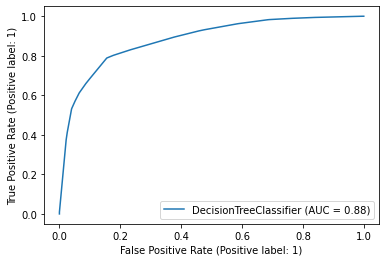

In [219]:
plot_roc_curve(dt1, X_tr, y_tr)

plt.show()

In [220]:
# Model predictions on test set

y_pred_test = dt1.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      8272
           1       0.26      0.64      0.37       729

    accuracy                           0.82      9001
   macro avg       0.61      0.74      0.63      9001
weighted avg       0.91      0.82      0.85      9001



In [221]:
print('Accuracy of Decision Tree on test data',test_acc)

Accuracy of Decision Tree on test data 0.8233529607821353


In [222]:
metric_df=pd.DataFrame({'Model':'DT','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

# Hyperparameter tuning on Decision Tree Classifier

In [223]:
# GridSearchCV for hyperparameter tuning

from sklearn.model_selection import GridSearchCV

In [224]:
dt1 = DecisionTreeClassifier()

# Range of hyperparameters

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    
}
grid_search = GridSearchCV(estimator=dt1,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [225]:
%%time

grid_search.fit(X_tr, y_tr)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 3.2 s
Wall time: 28.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [226]:
grid_search.best_score_

0.8692451265035256

In [227]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [228]:
dt_best = grid_search.best_estimator_

# Build the model on optimal parameters

dt_best.fit(X_tr, y_tr)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [229]:
# Prediction on train set

y_pred_tr = dt_best.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)

In [230]:
print('Accuracy of Hyperparameter tuned Decision Tree on train data',acc,'\n')

print('F1 Score of Hyperparameter tuned Decision Tree on train data',f_1,'\n')

print('Precision Score of Hyperparameter tuned Decision Tree on train data',prec,'\n')

print('Recall Score of Hyperparameter tuned Decision Tree on train data',rec)

Accuracy of Hyperparameter tuned Decision Tree on train data 0.7566103276648694 

F1 Score of Hyperparameter tuned Decision Tree on train data 0.769995835476838 

Precision Score of Hyperparameter tuned Decision Tree on train data 0.729856499326615 

Recall Score of Hyperparameter tuned Decision Tree on train data 0.8148071339693074


In [231]:
# Model predictions on test set

y_pred_test = dt_best.predict(X_test)

test_acc = accuracy_score(y_test, y_pred_test)

# classification report

print(classification_report(y_tr, y_pred_tr))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19288
           1       0.95      0.95      0.95     19288

    accuracy                           0.95     38576
   macro avg       0.95      0.95      0.95     38576
weighted avg       0.95      0.95      0.95     38576



In [232]:
print('Accuracy of Hyperparameter tuned Decision Tree on test data',test_acc)

Accuracy of Hyperparameter tuned Decision Tree on test data 0.8385734918342407


In [233]:
metric_df=pd.DataFrame({'Model':'Tuned DT','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


# Random Forest Classifier

In [234]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)

rf=rf.fit(X_tr,y_tr)

In [235]:
# Prediction on train set

y_pred_tr = rf.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)

# classification report

print(classification_report(y_tr, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19288
           1       1.00      1.00      1.00     19288

    accuracy                           1.00     38576
   macro avg       1.00      1.00      1.00     38576
weighted avg       1.00      1.00      1.00     38576



In [236]:
print('Accuracy of Random Forest on train data',acc,'\n')

print('F1 Score of Random Forest on train data',f_1,'\n')

print('Precision Score of Random Forest on train data',prec,'\n')

print('Recall Score of Random Forest on train data',rec)

Accuracy of Random Forest on train data 1.0 

F1 Score of Random Forest on train data 1.0 

Precision Score of Random Forest on train data 1.0 

Recall Score of Random Forest on train data 1.0


In [237]:
# Model predictions on test set

y_pred_test = rf.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

# classification report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8272
           1       0.46      0.47      0.47       729

    accuracy                           0.91      9001
   macro avg       0.71      0.71      0.71      9001
weighted avg       0.91      0.91      0.91      9001



In [238]:
print('Accuracy of Random Forest on test data',test_acc)

Accuracy of Random Forest on test data 0.9131207643595156


In [239]:
metric_df=pd.DataFrame({'Model':'RF','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

# Hyperparameter tuning on Random Forest Classifier

In [240]:
# Range of hyperparameters

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [241]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [242]:
%%time

grid_search.fit(X_tr, y_tr)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 15 s
Wall time: 21h 46min


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [243]:
grid_search.best_score_

0.9294379925342182

In [244]:
rf_best = grid_search.best_estimator_

rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [245]:
# Build final model on best estimator of Grid search CV

rf_best.fit(X_tr,y_tr)

y_pred_tr = rf_best.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)

In [246]:
print('Accuracy of Hyperparameter tuned Random Forest on train data',acc,'\n')

print('F1 Score of Hyperparameter tuned Random Forest on train data',f_1,'\n')

print('Precision Score of Hyperparameter tuned Random Forest on train data',prec,'\n')

print('Recall Score of Hyperparameter tuned Random Forest on train data',rec)

Accuracy of Hyperparameter tuned Random Forest on train data 0.978017420157611 

F1 Score of Hyperparameter tuned Random Forest on train data 0.9781747053070469 

Precision Score of Hyperparameter tuned Random Forest on train data 0.9712255954206276 

Recall Score of Hyperparameter tuned Random Forest on train data 0.9852239734549979


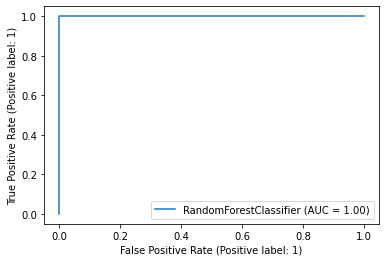

In [247]:
# ROC Curve

plot_roc_curve(rf, X_tr, y_tr)

plt.show()

In [248]:
# Prediction on test set

y_pred_test = rf_best.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8272
           1       0.42      0.53      0.47       729

    accuracy                           0.90      9001
   macro avg       0.69      0.73      0.71      9001
weighted avg       0.91      0.90      0.91      9001



In [249]:
print('Accuracy of Hyperparameter tuned Random Forest on test data',test_acc)

Accuracy of Hyperparameter tuned Random Forest on test data 0.9028996778135763


In [250]:
metric_df=pd.DataFrame({'Model':'Tuned RF','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

# XGBoost Classifier

In [252]:
# Build the XGBoost model

from xgboost import XGBClassifier

xgbclf=XGBClassifier()

xgbclf.fit(X_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [253]:
# Prediction on train set

y_pred_tr=xgbclf.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)

In [254]:
print('Accuracy of XGBoost on train data',acc,'\n')

print('F1 Score of XGBoost on train data',f_1,'\n')

print('Precision Score of XGBoost on train data',prec,'\n')

print('Recall Score of XGBoost on train data',rec)

Accuracy of XGBoost on train data 0.9826057652426379 

F1 Score of XGBoost on train data 0.9824772151568172 

Precision Score of XGBoost on train data 0.9897921599579058 

Recall Score of XGBoost on train data 0.9752695976773124


In [255]:
# Prediction on test set

y_pred_test=xgbclf.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8272
           1       0.51      0.42      0.46       729

    accuracy                           0.92      9001
   macro avg       0.73      0.69      0.71      9001
weighted avg       0.91      0.92      0.92      9001



In [256]:
print('Accuracy of XGBoost on test data',test_acc)

Accuracy of XGBoost on test data 0.9205643817353627


In [257]:
metric_df=pd.DataFrame({'Model':'XGB','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

In [258]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_tr,
                                                              y_score=xgbclf.predict_proba(X_tr)[:, 1]))

AUC on train data by XGBoost = 0.9985785142486883


# Hyperparameter tuning with XGBoost Classifier

In [259]:
# Creating KFold object 

folds = 5

# Range of hyperparameters

param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# Select the model

xgb_model = XGBClassifier()

# set up GridSearchCV()

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True) 

In [260]:
# Fit the model

model_cv.fit(X_tr, y_tr) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [261]:
# Model best score by GridSearch CV

model_cv.best_score_

0.9453055875008021

In [262]:
# Build final model on best estimator of Grid search CV

xgb_best=model_cv.best_estimator_

In [263]:
# Fit the optimum XGB model

xgb_best.fit(X_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [264]:
# Prediction on train set

y_pred_tr = xgb_best.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)

In [265]:
print('Accuracy of Hyperparameter tuned XGBoost on train data',acc,'\n')

print('F1 Score of Hyperparameter tuned XGBoost on train data',f_1,'\n')

print('Precision Score of Hyperparameter tuned XGBoost on train data',prec,'\n')

print('Recall Score of Hyperparameter tuned XGBoost on train data',rec)

Accuracy of Hyperparameter tuned XGBoost on train data 0.9802208627125674 

F1 Score of Hyperparameter tuned XGBoost on train data 0.980075727901815 

Precision Score of Hyperparameter tuned XGBoost on train data 0.9873204608828327 

Recall Score of Hyperparameter tuned XGBoost on train data 0.9729365408544173


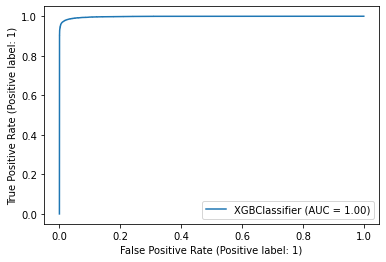

In [266]:
plot_roc_curve(xgb_best, X_tr, y_tr)

plt.show()

In [267]:
# Prediction on test set

y_pred_test=xgbclf.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8272
           1       0.51      0.42      0.46       729

    accuracy                           0.92      9001
   macro avg       0.73      0.69      0.71      9001
weighted avg       0.91      0.92      0.92      9001



In [268]:
print('Accuracy of hyperparameter tuned XGBoost on test data',test_acc)

Accuracy of hyperparameter tuned XGBoost on test data 0.9205643817353627


In [269]:
metric_df=pd.DataFrame({'Model':'Tuned XGB','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)

# The Final Score Card for different Models:

In [271]:
metric_df_final.round(4)

,Model,Train Accuracy,Recall,Precision,F1_Score,Test Accuracy
0,LR w/o Balancing,0.9207,0.0567,0.6554,0.1043,0.9199
1,LR w.Class Balancing,0.6992,0.7827,0.1839,0.2979,0.7043
2,LR w.SMOTE Balancing,0.7564,0.8143,0.7298,0.7698,0.7065
3,GLM/RFE,0.7501,0.8137,0.7218,0.7650,0.6929
4,PCA,0.7566,0.8148,0.7299,0.7700,0.7057
5,Optimum PCA,0.7329,0.8021,0.7046,0.7502,0.6758
6,DT,0.7566,0.8148,0.7299,0.7700,0.8234
7,Tuned DT,0.7566,0.8148,0.7299,0.7700,0.8386
8,RF,1.0000,1.0000,1.0000,1.0000,0.9131
9,Tuned RF,0.9780,0.9852,0.9712,0.9782,0.9029


# Conclusions

Decrease in Total data recharge amount and Maximum recharge amount in month 8 is a strong indicator of churn.

Decrease in incoming and outgoing special calls in month 8 shows high churn probability.

Decrease in 2G usage for Month 8 shows an increase trend of churn.



overall decrease in all kind of outgoing calls indicates a potential churn and New customers tend to churn easily.

we can see XGBoost(Train 98 and test 92) and Random Forest(Train 97 and test 90) produced the best prediction scores 

Logistic Regression with SMOTE balancing produced the best interpretable model with 29 variables.

The overall recharge amount for the months July and August will also indicate strongly about the possibility of retaining the customer or not.

The incoming STD calls and their duration would help to track down the churn.